# 투빅스 16기 정규세션 Week1 EDA - 16기 정수연

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import Image

warnings.filterwarnings(action='ignore')
%matplotlib inline

plt.style.use('seaborn') # matplotlib 테마
plt.rc('font', family='Malgun Gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rc('axes', unicode_minus=False) # 그래프에서 마이너스 기호가 표시되도록

In [2]:
org = pd.read_csv("assignment_data.csv", encoding="UTF8")

In [3]:
data = org.copy()

# Data Set Description

a dataset of IBM employee attrition data. Each row is personal and attrition information of an employee. 

1. Age : 해당 직원의 나이
2. Attrition : 퇴직 여부 Target값 (종속변수)
3. BusinessTravel : 출장의 빈도
4. DailyRate : 일 대비 급여의 수준
5. Department : 업무분야
6. DistanceFromHome : 집과의 거리
7. Education : 교육의 정도
8. EducationField : 전공
9. EmployeeCount : 직원 숫자
10. EmployeeNumber : 직원 ID
11. EnvironmentSatisfaction : 업무 환경에 대한 만족도
12. Gender : 성별
13. HourlyRate : 시간 대비 급여의 수준
14. JobInvolvement : 업무 참여도
15. JobLevel : 업무의 수준
16. JobRole : 업무 종류
17. JobSatisfaction : 업무 만족도
18. MaritalStatus : 결혼 여부
19. MonthlyIncome : 월 소득
20. MonthlyRate : 월 대비 급여 수준
21. NumCompaniesWorked : 일한 회사의 수
22. Over18 : 18세 이상
23. OverTime : 규정외 노동시간
24. PercentSalaryHike : 급여의 증가분 백분율
25. PerformanceRating : 업무 성과
26. RelationshipSatisfaction : 대인관계 만족도
27. StandardHours : 표준 시간
28. StockOptionLevel : 스톡옵션 정도
29. TotalWorkingYears : 경력 기간
30. TrainingTimesLastYear : 교육 시간
31. WorkLifeBalance : 일과 생활의 균형 정도
32. YearsAtCompany : 근속 연수
33. YearsInCurrentRole : 현재 역할의 년수
34. YearsSinceLastPromotion : 마지막 프로모션
35. YearsWithCurrManager : 현재 관리자와 함께 보낸 시간

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

본 데이터에는 `결측치`가 존재하지 않음을 확인할 수 있습니다.

## 1. Data Cleaning

### 1.1. 불필요한 feature 삭제

In [6]:
for column in data.columns:
    print(f"{column}: {data[column].nunique()}")

Age: 43
Attrition: 2
BusinessTravel: 3
DailyRate: 886
Department: 3
DistanceFromHome: 29
Education: 5
EducationField: 6
EmployeeCount: 1
EmployeeNumber: 1470
EnvironmentSatisfaction: 4
Gender: 2
HourlyRate: 71
JobInvolvement: 4
JobLevel: 5
JobRole: 9
JobSatisfaction: 4
MaritalStatus: 3
MonthlyIncome: 1349
MonthlyRate: 1427
NumCompaniesWorked: 10
Over18: 1
OverTime: 2
PercentSalaryHike: 15
PerformanceRating: 2
RelationshipSatisfaction: 4
StandardHours: 1
StockOptionLevel: 4
TotalWorkingYears: 40
TrainingTimesLastYear: 7
WorkLifeBalance: 4
YearsAtCompany: 37
YearsInCurrentRole: 19
YearsSinceLastPromotion: 16
YearsWithCurrManager: 18


`EmployeeCount`, `Over18`, `StandardHours`의 unique 값이 하나이고, `EmployeeNumber`의 unique 값이 1470개이므로  제거해줍니다.

In [7]:
data.drop(['Over18','StandardHours','EmployeeCount','EmployeeNumber'],axis=1,inplace=True)

### 1.2. 수치형 변수를 범주형 변수로 변환

In [8]:
education_dict = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
level_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
performance_dict = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
balance_dict = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}

In [9]:
data.replace({'Education': education_dict, 'EnvironmentSatisfaction': level_dict, 
              'JobInvolvement': level_dict, 'JobSatisfaction': level_dict,
              'PerformanceRating': performance_dict, 'RelationshipSatisfaction': level_dict, 
              'WorkLifeBalance': balance_dict
             }, inplace=True)

In [10]:
# categorical
disc_col = []
for column in data.columns:
    if data[column].dtypes == object: 
        print(f"{column} : {data[column].unique()}")
        disc_col.append(column)
        print("====================================")

Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
Education : ['College' 'Below College' 'Master' 'Bachelor' 'Doctor']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EnvironmentSatisfaction : ['Medium' 'High' 'Very High' 'Low']
Gender : ['Female' 'Male']
JobInvolvement : ['High' 'Medium' 'Very High' 'Low']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
JobSatisfaction : ['Very High' 'Medium' 'High' 'Low']
MaritalStatus : ['Single' 'Married' 'Divorced']
OverTime : ['Yes' 'No']
PerformanceRating : ['Excellent' 'Outstanding']
RelationshipSatisfaction : ['Low' 'Very High' 'Medium' 'High']
WorkLifeBalance : ['Bad' 'Better' 'Good' 'Best']


In [11]:
# numerical
disc_col = []
for column in data.columns:
    if data[column].dtypes != object: 
        print(f"{column} : {data[column].nunique()}"+"개 입니다.")
        if data[column].nunique() < 30:
            print(f"{data[column].unique()}")
        disc_col.append(column)
        print("====================================")

Age : 43개 입니다.
DailyRate : 886개 입니다.
DistanceFromHome : 29개 입니다.
[ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
HourlyRate : 71개 입니다.
JobLevel : 5개 입니다.
[2 1 3 4 5]
MonthlyIncome : 1349개 입니다.
MonthlyRate : 1427개 입니다.
NumCompaniesWorked : 10개 입니다.
[8 1 6 9 0 4 5 2 7 3]
PercentSalaryHike : 15개 입니다.
[11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
StockOptionLevel : 4개 입니다.
[0 1 3 2]
TotalWorkingYears : 40개 입니다.
TrainingTimesLastYear : 7개 입니다.
[0 3 2 5 1 4 6]
YearsAtCompany : 37개 입니다.
YearsInCurrentRole : 19개 입니다.
[ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
YearsSinceLastPromotion : 16개 입니다.
[ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
YearsWithCurrManager : 18개 입니다.
[ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]


### 1.3. 전체 속성 제거

#### 1.3.1. NumCompaniesWork

`NumCompaniesWork(일한 회사의 수)`의 값 중 0인 것이 이상합니다. 만약 첫 직장이 IBM인 경우를 0으로 표시한 것이라면, 총 경력기간과 회사의 근속년수가 같아야 할 것입니다.

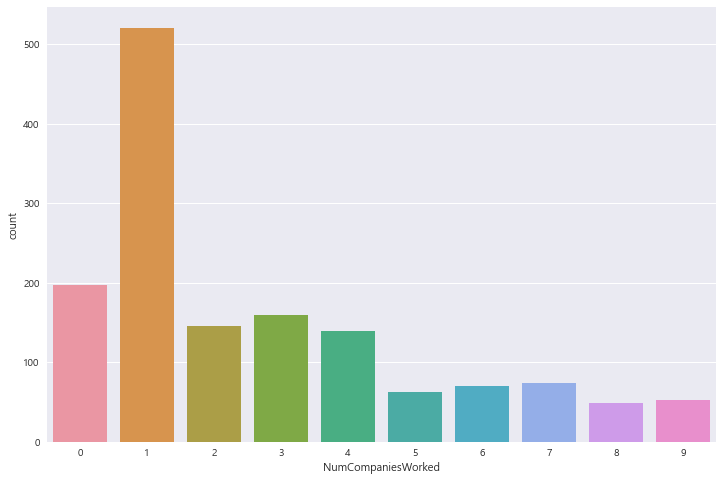

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(data["NumCompaniesWorked"])
plt.show()

In [13]:
data[(data["NumCompaniesWorked"] == 0) & (data["TotalWorkingYears"] == data["YearsAtCompany"])][['NumCompaniesWorked','TotalWorkingYears','YearsAtCompany']]

,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany


`NumCompaniesWork(일한 회사의 수)`가 0인 사람 중에 `총 경력기간 = 회사의 근속년수`인 경우는 없습니다.

In [14]:
data[data["NumCompaniesWorked"] == 0][['NumCompaniesWorked','TotalWorkingYears','YearsAtCompany']]

,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany
5,0,8,7
8,0,10,9
10,0,6,5
11,0,10,9
13,0,3,2
...,...,...,...
1439,0,10,9
1445,0,21,20
1462,0,21,20
1463,0,10,9


`NumCompaniesWork(일한 회사의 수)`가 0인 경우, 총 경력기간과 회사의 근속년수가 모두 1년씩 차이나는 것으로 확입됩니다.

In [15]:
data[data["TotalWorkingYears"] == data["YearsAtCompany"]][['NumCompaniesWorked','TotalWorkingYears','YearsAtCompany']]

,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany
1,1,10,10
3,1,8,8
7,1,1,1
12,1,5,5
15,1,10,10
...,...,...,...
1451,1,10,10
1456,1,10,10
1458,1,4,4
1460,1,5,5


In [16]:
data[data["TotalWorkingYears"] == data["YearsAtCompany"]][['NumCompaniesWorked','TotalWorkingYears','YearsAtCompany']]["NumCompaniesWorked"].unique()

array([1], dtype=int64)

총 경력기간과 회사의 근속년수가 1년씩 차이나는 경우, `일한 회사의 수가 모두 1`로 확인됩니다. 일한 회사의 수가 1인 칼럼의 수는 521개이므로 나머지 47개의 칼럼의 값은 어떤지 확인해보겠습니다.

In [17]:
data[(data["NumCompaniesWorked"] == 1) & (data["TotalWorkingYears"] -1 == data["YearsAtCompany"])][['NumCompaniesWorked','TotalWorkingYears','YearsAtCompany']]

,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany
35,1,6,5
45,1,23,22
94,1,12,11
109,1,1,0
129,1,16,15
184,1,5,4
186,1,21,20
211,1,12,11
324,1,11,10
414,1,6,5


나머지 47개의 칼럼은 모두 총 경력기간과 근속년수가 1년씩 차이남을 알 수 있습니다.

`총 경력기간과 근속년수가 2년`씩 차이나는 경우를 확인해보았습니다. 

In [18]:
data[data["TotalWorkingYears"] -2 == data["YearsAtCompany"]][['NumCompaniesWorked','TotalWorkingYears','YearsAtCompany']]

,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany
0,8,8,6
14,5,6,4
28,3,24,22
57,3,4,2
62,5,29,27
...,...,...,...
1442,9,4,2
1443,5,24,22
1453,4,8,6
1466,4,9,7


근속년수가 6년이고, 총 경력기간이 8년인데 일한 회사의 수가 8인 값 등 이상치가 많이 보입니다. 본 feature를 믿을 수 있을지 의문이 들어 분석에서 제거하도록 하겠습니다. 

In [19]:
data.drop(['NumCompaniesWorked'],axis=1,inplace=True)

#### 1.3.2. MonthlyRate, DailyRate, HourlyRate

In [20]:
(data["DailyRate"] / data['HourlyRate']).sort_values()

314      1.181818
1437     1.206897
884      1.273810
636      1.354167
1132     1.404762
          ...    
105     44.375000
867     47.366667
110     48.533333
172     49.333333
408     49.666667
Length: 1470, dtype: float64

In [21]:
(data["DailyRate"] / data['HourlyRate']).sort_values().median()

11.973817705776469

`DailyRate`에서 `HourlyRate`를 나누어 보았습니다. 범위가 1.18에서 49.66까지 다양합니다. 만약 수당(휴일, 특근, 야간)을 1.5배 또는 2배로 받는다고 가정해보아도 49.66 같은 수치는 쉽게 이해하기 어렵습니다. 

In [22]:
(data['MonthlyRate'] / data["DailyRate"]).sort_values()

396       1.511881
63        1.640418
789       1.690407
473       1.706827
913       1.720497
           ...    
205     202.685950
1403    210.907563
591     224.635593
732     236.009174
1110    255.951923
Length: 1470, dtype: float64

In [23]:
(data['MonthlyRate'] / data["DailyRate"]).sort_values().median()

17.45652537518616

`MontlyRate`를 `DailyRate`로 나눈 값도 범위가 1.51에서 255.95로 굉장히 다양한 것을 확인할 수 있습니다. 한 달이 31이라고 가정했을 때 255.95가 나오기 위해서는 매일매일 일하고 거기다 8배 이상의 수당을 받아야 가능한 수치입니다. median의 값은 17로 한 달 근무 일자와 비슷하나 이상치가 많아 이 역시 신뢰할 수 없을 것 같습니다. 따라서 본 분석에서 제외하였습니다.

In [24]:
data.drop(['MonthlyRate', 'DailyRate', 'HourlyRate'],axis=1,inplace=True)

## 2. EDA

### 2.1. 이상치 탐색

In [25]:
data.describe()

,Age,DistanceFromHome,JobLevel,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.063946,6502.931293,15.209524,0.793878,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.106940,4707.956783,3.659938,0.852077,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1009.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,1.000000,2911.000000,12.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,2.000000,4919.000000,14.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,3.000000,8379.000000,18.000000,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,19999.000000,25.000000,3.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [26]:
num_feature = ['Age','DistanceFromHome', 'JobLevel', 'MonthlyIncome',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [27]:
cate_feature = ['BusinessTravel', 'Department', 
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'OverTime', 
       'PerformanceRating', 'RelationshipSatisfaction', 
       'WorkLifeBalance']

Text(0.5, 0.98, 'Histogram (Numerical Variables)')

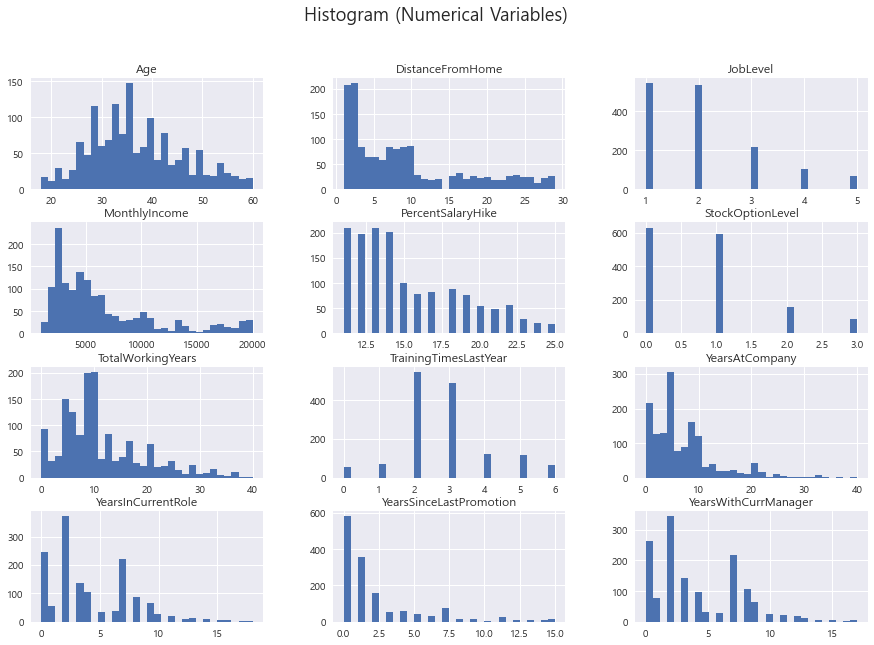

In [28]:
data[num_feature].hist(bins=30, figsize=(15,10))
plt.suptitle("Histogram (Numerical Variables)", fontsize=18)

특별히 이상치로 보이는 값은 없습니다. 이제부터 각 변수들을 자세히 살펴보겠습니다!

### 2.2. target 변수(Attrition)

In [29]:
def pie_plot(feature):
    plt.figure(figsize=(9,6))
    data[feature].value_counts().plot.pie(autopct='%1.1f%%')

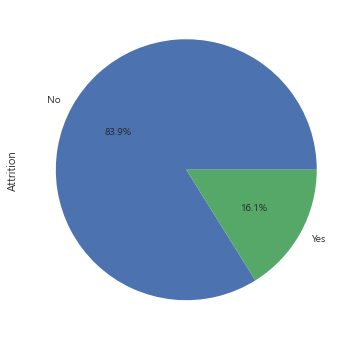

In [30]:
pie_plot("Attrition")

Dataset이 `1(이직)` 16.1%(237), `0(이직X)` 83.9(1233)으로 **imbalance set**인 것을 확인 할 수 있었습니다. 

### 2.3. Age

In [31]:
def count_plot(feature):
    plt.figure(figsize=(9,6))
    g1 = sns.countplot(data = data, x = feature)
    g1.set_title(f"{feature} Distribution")
    plt.show()

In [32]:
def bar_plot(feature):
    plt.figure(figsize=(9,6))
    g2 = sns.barplot(x=data[feature],y=data['Attrition'])
    g2.set_title(f"{feature} Distribution by Atrribution")
    plt.xticks(rotation=45)
    plt.show()

In [33]:
data['Attrition'].replace(['Yes','No'],[1,0],inplace=True)

**Assumption**: `나이가 많을 수록 퇴직 연령에 가까워 퇴직률이 높을 것입니다.`

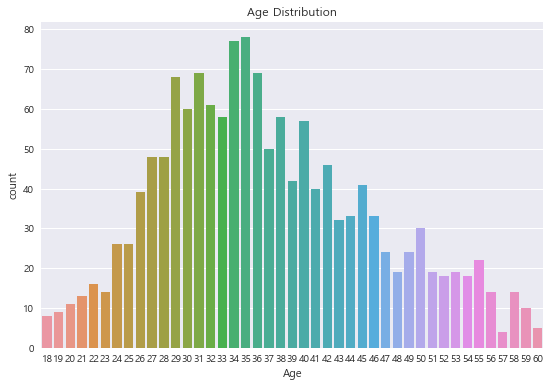

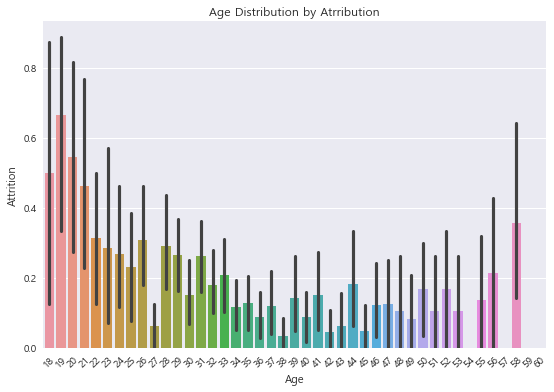

In [34]:
count_plot("Age")
bar_plot("Age")

가설처럼 50대 후반의 퇴직률이 높은 것을 확인할 수 있었습니다. 이는 정년퇴임의 영향으로 보입니다. 사실, 이보다 눈에 띄는 것은 `사회초년생들의 퇴직률`이었습니다. 오히려 **정년퇴임과 가까운 나이보다, 사회초년생들의 퇴직률이 더욱 높음**을 확인할 수 있습니다.

### 2.4. BusinessTravel

**Assumption**: 출장이 잦으면 스트레스를 받을 가능성이 더 높습니다. 따라서 `출장이 잦을 수록 퇴직률이 높을 것입니다.`

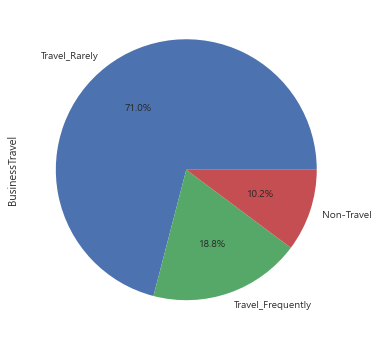

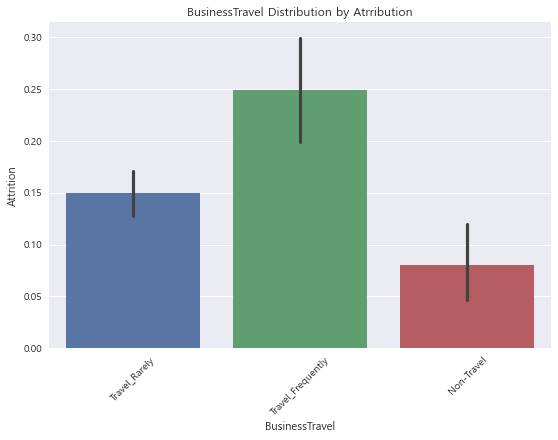

In [35]:
pie_plot("BusinessTravel")
bar_plot("BusinessTravel")

출장을 가끔 가는 사람이 71%로 가장 많은 것을 확인할 수 있었습니다. 출장빈도에 따른 퇴직률을 살펴봤을 때는, 가설처럼 **Travel Frequency > Travel Rarely > Non Travel** 순으로 퇴직률이 높았습니다. 즉, **출장을 자주 갈 수록 퇴직률이 높아짐**을 확인할 수 있습니다. 

### 2.5. Department

**Assumption**: IBM은 원래 하드웨어/소프트웨어 개발, 판매 하는 회사로 출발하여, 현재는 IT 서비스를 제공하는 회사로 바뀌어 주요 매출이 대부분 컨설팅/서비스에서 나오고 있습니다. 업의 특성을 생각해보았을 때 주요 업무라고 할 수 있는 `R&D의 퇴사율이 낮고, 그 다음으로 Sales, 마지막으로 HR이 가장 높을 것`으로 생각됩니다. 

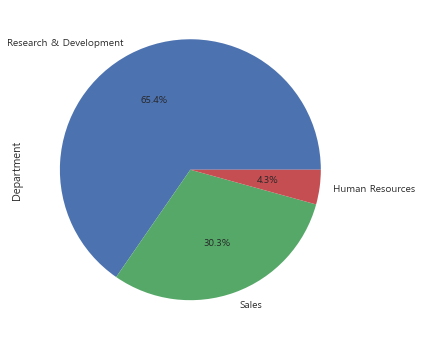

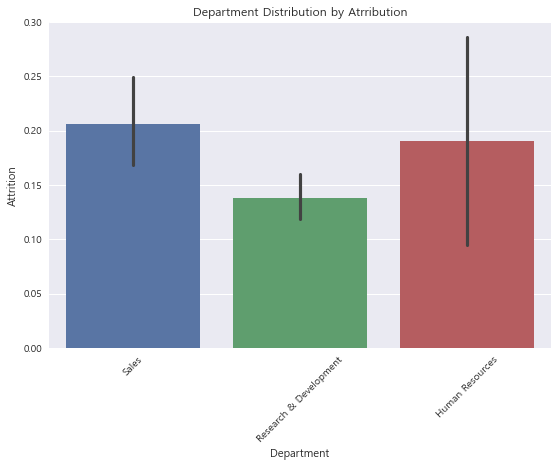

In [36]:
pie_plot("Department")
bar_plot("Department")

R&D팀이 65.4%로 가장 많고, Sales는 30.3%로 그 다음, HR팀이 4.3%로 적은 것을 확인할 수 있습니다. **가장 인원 수가 많은 R&D팀이 가장 퇴직률이 낮았으며, H&R팀과 Sales팀의 퇴직률이 상대적으로 높았습니다**. 가설처럼, 회사의 메이저 부서인 R&D팀의 퇴직률이 낮고, 상대적으로 `마이너 부서인 H&R팀과 Sales팀의 퇴직률이 높은 것`으로 보입니다.

### 2.6. DistanceFromHome

**Assumption**: `집에서 회사까지의 거리가 멀 수록 퇴직률이 높을 것입니다.`

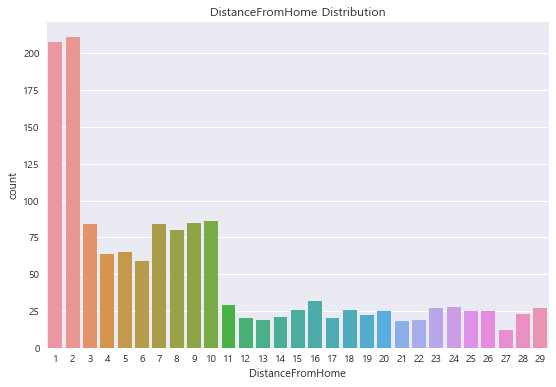

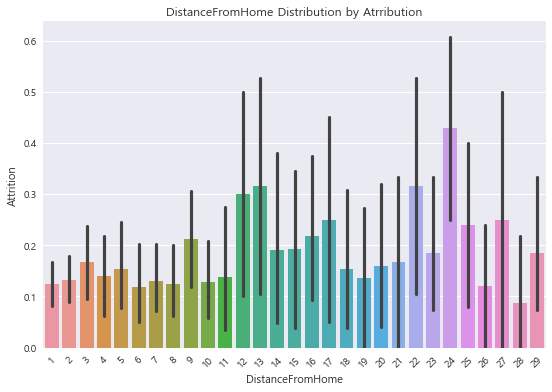

In [37]:
count_plot("DistanceFromHome")
bar_plot("DistanceFromHome")

많은 사람들이 회사 가까이에 살고 있습니다. 가설처럼 **회사에서 멀수록 퇴직률이 높아지는 경향을 확인할 수 있었습니다.**

### 2.7. Education

**Assumption**: 앞서 어린 나이일 수록 퇴직률이 높은 것을 확인했습니다. 어린 나이에는 비교적 퇴사 후 새로운 도전을 하기 쉽기에 학사생 이하가 석·박사생보다 퇴직이 쉬울 것으로 생각됩니다. `Bellow College, College, Bachelor이 Master, Doctor보다 퇴직률이 높을 것입니다`. 

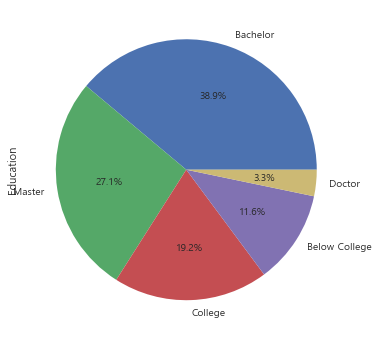

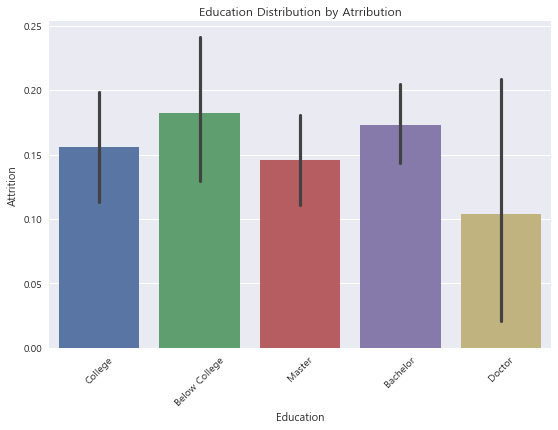

In [38]:
pie_plot("Education")
bar_plot("Education")

Bachelor(4년제 졸업생)이 가장 많고, Doctor(박사)가 가장 적었습니다. 박사까지 하는 수가 적으므로 이는 자연스러운 것으로 보입니다. 퇴직률을 봤을 때, `Below College > Bachelor > College > Master > Doctor` 순으로 앞서 세운 가정이 어느정도 들어맞는 것을 확인했습니다.

### 2.8. Education Field

**Assumption**: 앞서 주요 부서인 R&D팀이 가장 퇴직률이 낮았으며, 상대적으로 마이너 부서인 H&R팀과 Sales팀의 퇴직률이 상대적으로 높았습니다. 따라서 `R&D팀 연관 전공인 
Life Science의 퇴직률이 낮고, Sales팀 연관 전공인 Marketing과 HR팀 연관 전공인 Human Resources의 퇴직률은 높을 것` 같습니다. 또한, Below degree의 퇴직률이 높으므로 Technical Degree의 퇴직률도 높을 것입니다.

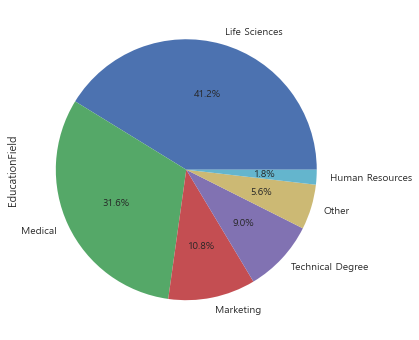

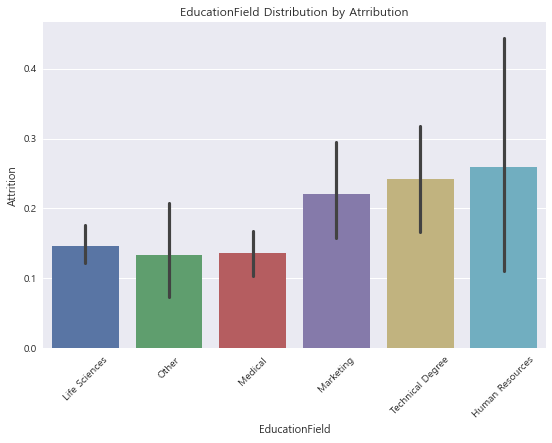

In [39]:
pie_plot("EducationField")
bar_plot("EducationField")

예상대로 `Life Sciences의 퇴직률은 낮은 편이었으며, Marketing, Technical Degree, Human Resources의 퇴직률은 높은 것`으로 나왔습니다. **출신 전공의 퇴직률 역시 회사의 주요 업무에 영향**받은 결과로 보입니다. 

### 2.9. Environment Satisfaction

**Assumption**: 환경만족도가 높을 수록 퇴직률이 낮을 것입니다.

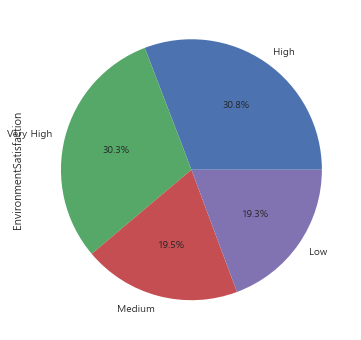

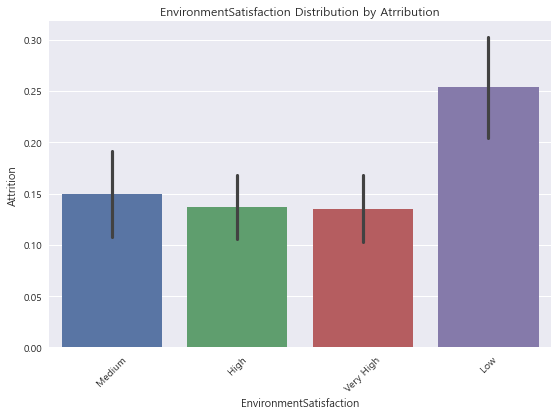

In [40]:
pie_plot("EnvironmentSatisfaction")
bar_plot("EnvironmentSatisfaction")

`환경만족도가 낮을 수록 퇴직률이 높은 것을 확인 할 수 있었습니다`. 눈에 띄는 것은 'Very high'의 퇴직률이 'High'의 퇴직률보다 약간 더 높다는 것입니다. 또한, 'Very high', 'high', 'Medium'의 퇴직률은 크게 차이 나지 않지만, 'Low'의 퇴직률은 크게 높아집니다. 이를 통해 **환경만족도가 중간이거나 그 이상일 때는 퇴직률이 높지 않으나, 불만족스럽다고 느끼는 순간 퇴직욕구가 상승함을 알 수 있습니다.**

### 2.10. Gender

**Assumption**: 여성의 경우, 결혼 또는 출산으로 퇴사를 하는 경우가 많기 때문에 남성보다는 여성의 퇴직률이 높을 것입니다.

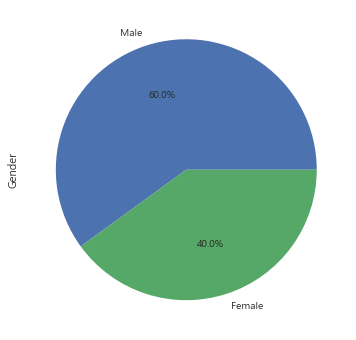

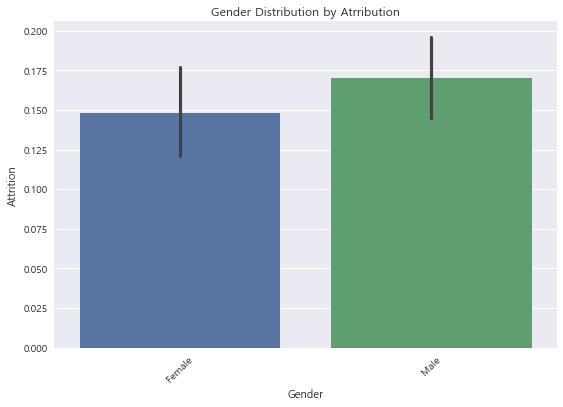

In [41]:
pie_plot("Gender")
bar_plot("Gender")

예상과는 다르게 `남성의 퇴직률이 여성보다 더 높았습니다`. 나이에 따른 퇴직률을 성별별로 그려보아 결혼 적령기와 아이를 나을 시기에 여성의 퇴직률이 더 높은지를 확인해보았습니다.

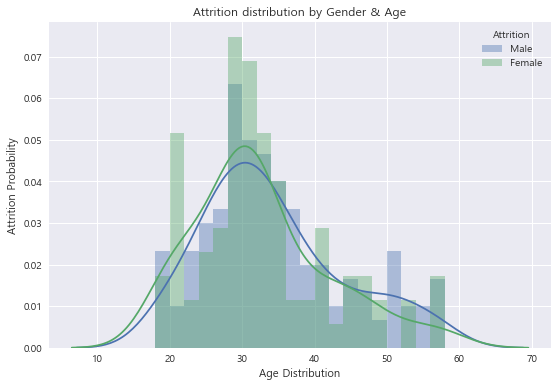

In [42]:
plt.figure(figsize=(9,6))
g = sns.distplot(data[(data['Attrition'] == 1)&(data['Gender']=='Male')]['Age'], label='Male', bins=20)
g = sns.distplot(data[(data['Attrition'] == 1)&(data['Gender']=='Female')]['Age'], label='Female', bins=20)
g.legend(title='Attrition')
g.set_title("Attrition distribution by Gender & Age")
g.set_xlabel("Age Distribution")
g.set_ylabel("Attrition Probability")
plt.show()

결혼을 하고 아이를 나을 시기인 30대 초중반에 여성의 퇴직률이 더 높은 것을 확인할 수 있었습니다. 보통 여성보다 남성의 결혼 연령이 늦는다는 것을 고려했을 때, 30대 후반에는 남성의 퇴직률이 높습니다. 따라서 `출산 때문에 여성이 남성보다 퇴사를 많이 한다고 말하기는 어려울 것` 같습니다. **20대 극초반에 여성의 퇴직률이 압도적으로 높은  것**도 흥미로운 부분이었습니다. 

`남녀 사이에 임금격차가 있는지`도 확인하고 싶어졌습니다. **박스플롯**과 **바이올린플롯**으로 나타내어 비교해 보았습니다.

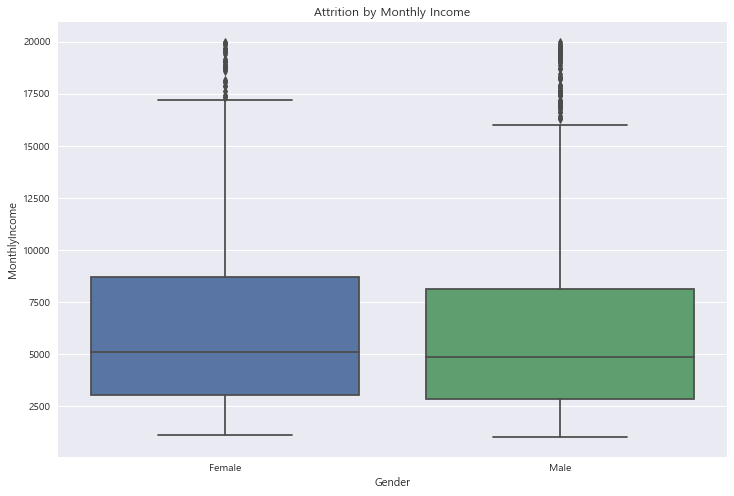

In [43]:
plt.figure(figsize = (12,8))
plt.title('Attrition by Monthly Income')
sns.boxplot(x = 'Gender', y = 'MonthlyIncome', data = data)
plt.show()

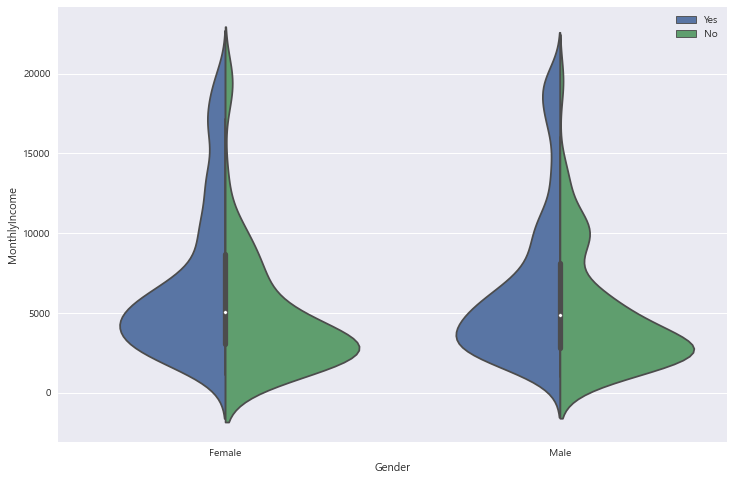

In [44]:
fig,ax = plt.subplots(figsize=(12,8))
g = sns.violinplot(x='Gender', y='MonthlyIncome', hue='Attrition', split=True, data=data)
g.legend(handles=ax.legend_.legendHandles, labels=['Yes', 'No'])
plt.show()

거의 차이가 나지 않는 데다가 오히려 여성이 남성보다 약간 더 높은 월급을 받습니다.

### 2.11. Job Involvement

**Assumption**: 직무몰입도가 높을 수록 퇴직률이 낮을 것입니다.

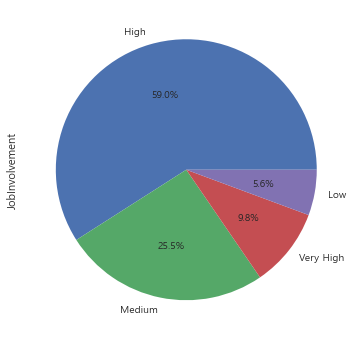

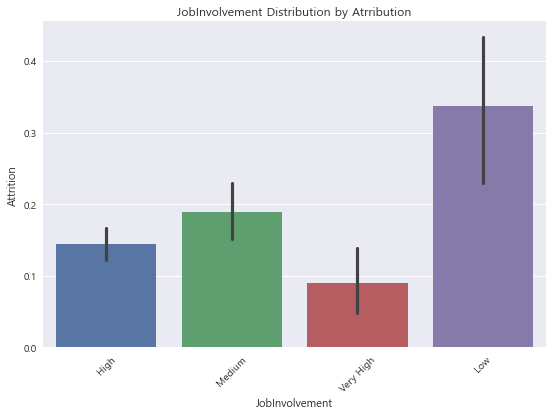

In [45]:
pie_plot("JobInvolvement")
bar_plot("JobInvolvement")

예상대로 `직무몰입도가 높을 수록 퇴직률이 낮았습니다`. 환경만족도와도 비슷한 결과가 나왔었는데요, **직무몰입도가 보통이거나 높을 때 보다 직무 몰입도가 낮을 때 퇴사율이 급증**하는 것을 확인할 수 있었습니다.

### 2.12. Job Level

**Assumption**: 업무수준이 낮을 수록 퇴직률이 높을 것입니다.

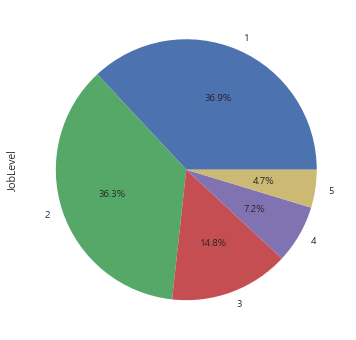

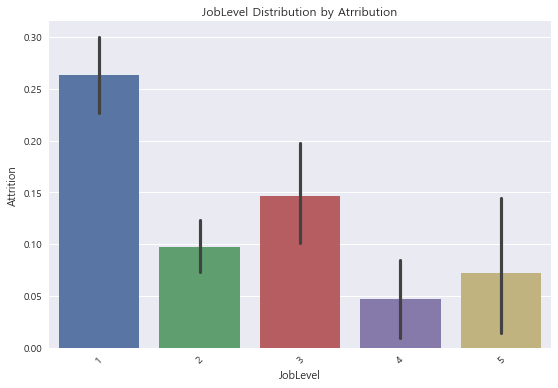

In [46]:
pie_plot("JobLevel")
bar_plot("JobLevel")

`업무수준이 낮을 수록 사회초년생이 많아 Job Level이 1일때의 퇴직률이 압도적으로 많은 것`으로 보입니다. 그 위의 2, 3, 4, 5 레벨은 퇴직률이 들쭉날쭉하여 이에 대한 인사이트를 찾기 어려웠습니다.

### 2.13. Job Role

**Assumption**: 앞서 살펴보았던 부서, 출신 전공과 비슷하게 본 회사의 `메이저 직무인 R&D 팀과 관련된 Job Role의 퇴직률이 낮을 것이고, Sales와 HR 팀과 관련된 Job Role의 퇴직률이 높을 것`이다.

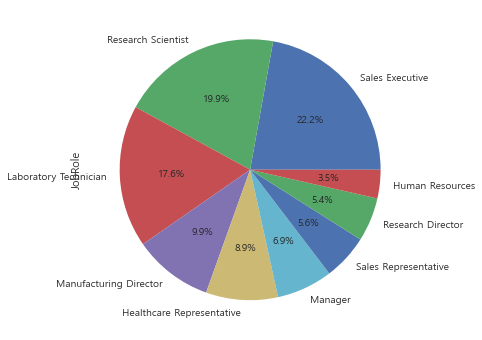

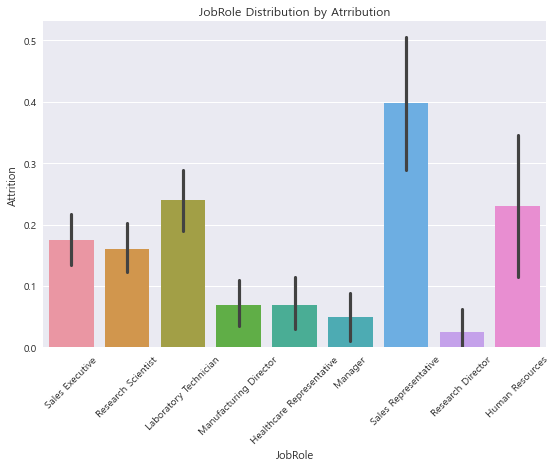

In [47]:
pie_plot("JobRole")
bar_plot("JobRole")

예상대로 `Sales Representative와 Human Resources의 퇴직률이 높게 나왔다`. 눈에 띄는 것은 Sales Executive의 퇴직률은 예상보다 낮다는 것인데, 이는 직급이 더 높아 입사 초기에 빠지는 인원이 Sales Representative에서 모두 빠져나가 상대적으로 퇴직률이 낮게 나온 것으로 보인다. 

### 2.14. Job Satisfaction

**Assumption**: `직무 만족도가 낮을수록 퇴직을 많이 할 것입니다.`

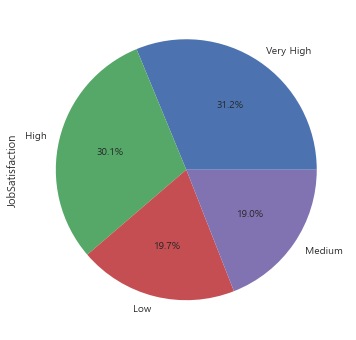

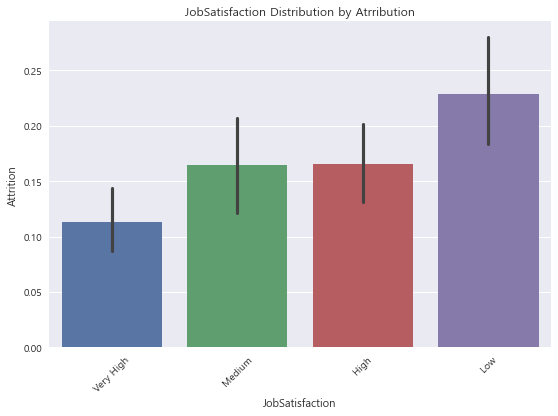

In [48]:
pie_plot("JobSatisfaction")
bar_plot("JobSatisfaction")

예상대로 `직무 만족도가 낮을 수록 퇴직을 많이 하는 것`으로 나왔다. 'Very high < Medium < High < Low 순으로 Medium과 High 사이에는 큰 차이가 없었으나 Very high와 Medium, High와 Low의 격차는 꽤나 크게 나타났다.

### 2.14. Marital Status

**Assumption**: 가정이 있을 때의 퇴직보다는 미혼인 경우의 퇴직이 더 쉽다. 특히 사회 초년생의 퇴직이 많은 만큼, 미혼인 경우의 퇴직률이 높을 것으로 보인다.

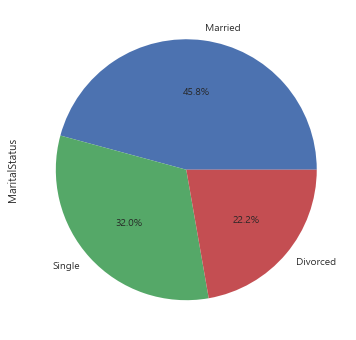

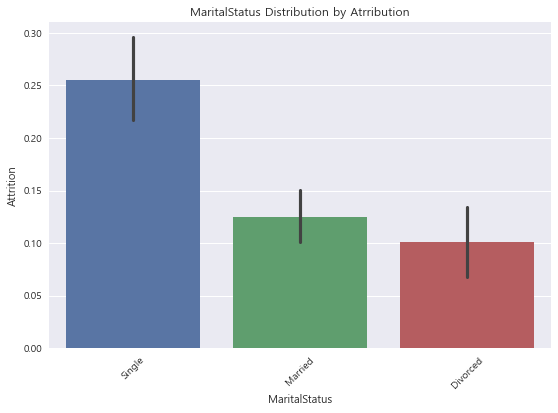

In [49]:
pie_plot("MaritalStatus")
bar_plot("MaritalStatus")

예상대로 `미혼의 퇴직률이 가장 높은 것`으로 나타났다. 또한 결혼을 할 경우 출산 또는 육아 퇴직의 가능성이 있어 이혼보다 퇴직률이 높은 것이 아닌가 짐작해보았다.

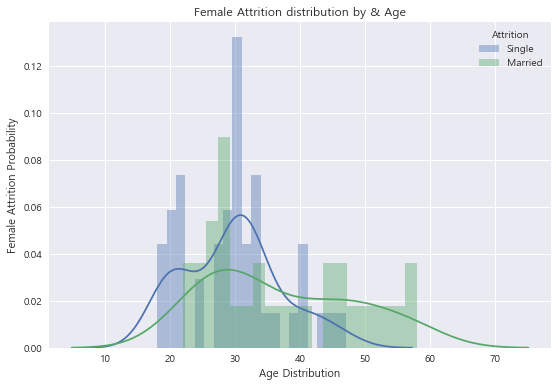

In [50]:
plt.figure(figsize=(9,6))
g = sns.distplot(data[(data['Attrition'] == 1)&(data['Gender']=='Female')&(data['MaritalStatus']=='Single')]['Age'], label='Single', bins=20)
g = sns.distplot(data[(data['Attrition'] == 1)&(data['Gender']=='Female')&(data['MaritalStatus']=='Married')]['Age'], label='Married', bins=20)
#g = sns.distplot(data[(data['Attrition'] == 1)&(data['MaritalStatus']=='Divorced')]['Age'], label='Divorced', bins=20)
g.legend(title='Attrition')
g.set_title("Female Attrition distribution by & Age")
g.set_xlabel("Age Distribution")
g.set_ylabel("Female Attrition Probability")
plt.show()

앞서 궁금했던, **여성의 퇴직률은 결혼에 영향을 받는가**를 결혼 여부 Feature를 활용하여 다시 한 번 살펴보았다. 20대 중후반의 퇴직률은 기혼자가 많았으나 30대 초중반의 퇴직률은 미혼자가 더 많아 이 그래프에서도 여성의 퇴직률과 결혼의 관계를 살펴보기는 힘들었다. 

### 2.15. Monthly Income

**Assumption**: Monthly Income이 높을 수록 퇴직률이 더 낮을 것이다. 

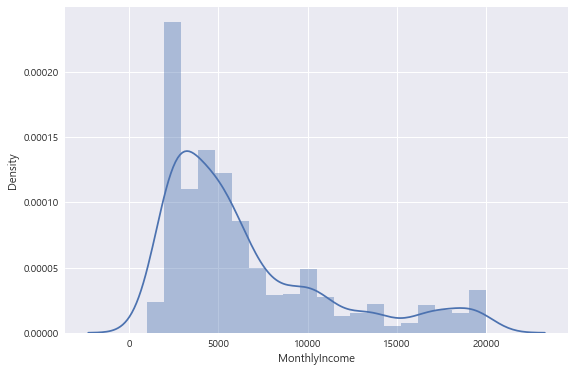

In [51]:
plt.figure(figsize=(9,6))
sns.distplot(data['MonthlyIncome'],kde=True)

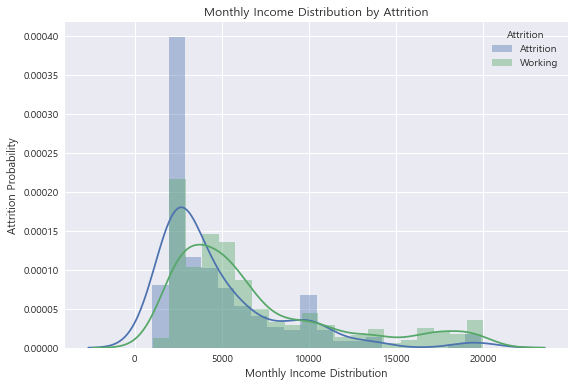

In [52]:
plt.figure(figsize=(9,6))
g = sns.distplot(data[(data['Attrition'] == 1)]['MonthlyIncome'], label='Attrition', bins=20)
g = sns.distplot(data[(data['Attrition'] == 0)]['MonthlyIncome'], label='Working', bins=20)
g.legend(title='Attrition')
g.set_title("Monthly Income Distribution by Attrition")
g.set_xlabel("Monthly Income Distribution")
g.set_ylabel("Attrition Probability")
plt.show()

`급여가 낮을 수록 퇴직률이 높은 것`을 확인할 수 있었습니다.

### 2.14. Overtime

**Assumption**: `Overtime 근무를 하면 퇴직률이 더 높을 것`입니다.

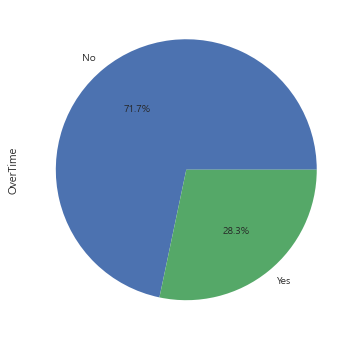

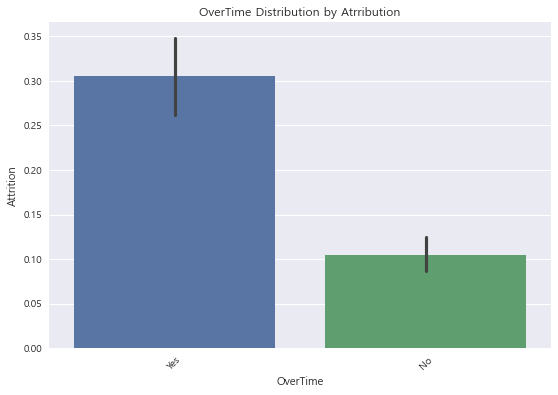

In [53]:
pie_plot("OverTime")
bar_plot("OverTime")

예상대로 `Overtime 근무를 하면 퇴직률이 더 높은 것`으로 나왔습니다. R&D 팀이 타 부서보다 Overtime 근무를 할 가능성이 높을 것 같아 이를 확인해보고 싶었습니다.

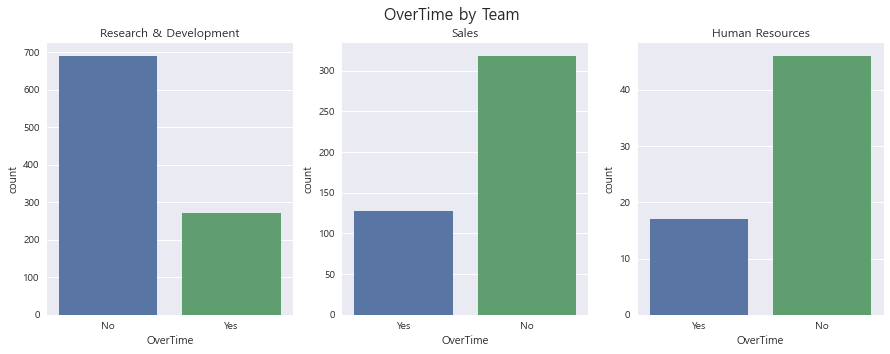

In [54]:
f,axes=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
axes = np.atleast_2d(axes)
plt.suptitle("OverTime by Team", fontsize=16)

g1 = sns.countplot(data = data[data['Department']=="Research & Development"], x = 'OverTime',ax=axes[0,0])
g2 = sns.countplot(data = data[data['Department']=="Sales"], x = 'OverTime',ax=axes[0,1])
g3 = sns.countplot(data = data[data['Department']=="Human Resources"], x = 'OverTime',ax=axes[0,2])
axes[0, 0].set_title("Research & Development")
axes[0, 1].set_title("Sales")
axes[0, 2].set_title("Human Resources")
plt.show()

초과근무 비율은 부서와 상관없이 비슷한 것으로 확인됩니다.

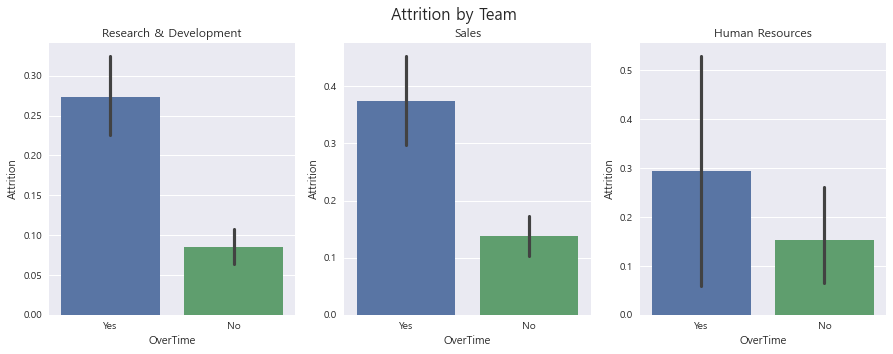

In [55]:
f,axes=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
axes = np.atleast_2d(axes)
plt.suptitle("Attrition by Team", fontsize=16)
sns.barplot(x=data['OverTime'],y=data[data['Department']=="Research & Development"]['Attrition'],ax=axes[0,0])
sns.barplot(x=data['OverTime'],y=data[data['Department']=="Sales"]['Attrition'],ax=axes[0,1])
sns.barplot(x=data['OverTime'],y=data[data['Department']=="Human Resources"]['Attrition'],ax=axes[0,2])

axes[0, 0].set_title("Research & Development")
axes[0, 1].set_title("Sales")
axes[0, 2].set_title("Human Resources")
plt.show()

야근을 할 경우 Sales부서 > H&R 부서 > R&D 부서 순으로 퇴직률이, 야근을 하지 않을 경우 H&R 부서 > Sales 부서 > R&D 부서 순으로 퇴직률이 높습니다.

### 2.15. Percent Salary Hike

**Assumption**: 누구나 급여가 오르면 행복합니다. 급여의 증가분(백분율)이 낮을 수록 퇴직률이 높을 것입니다. 

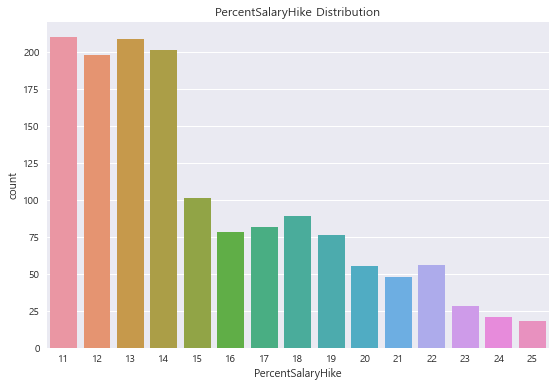

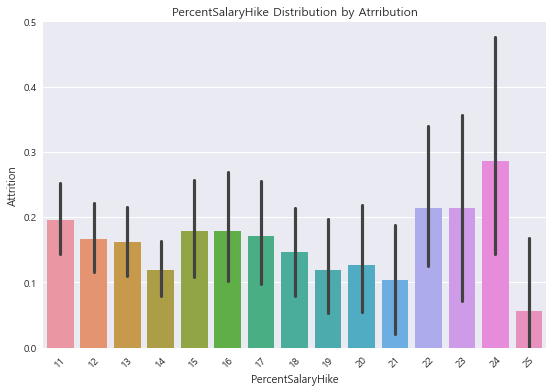

In [56]:
count_plot("PercentSalaryHike")
bar_plot("PercentSalaryHike")

11~14의 급여 인상을 받은 사람들이 대다수였습니다. 예상과는 다르게 오히려 `급여 인상폭이 높아질 수록 퇴직률도 높은 것`으로 나왔습니다. 이에 대해 두 가지 가설을 세워볼 수 있습니다. 1. 실력과 성과가 좋은 사람이 급여 인상폭이 높을 것이고, 이직도 쉽기에 퇴직률이 높을 것입니다. 2. 입사 초기에 급여 인상폭이 높아 퇴직률이 높을 것 입니다. 

### 2.16. Performance Rating

**Assumption**: 성과 등급이 낮을 수록 퇴직률이 높을 것입니다.

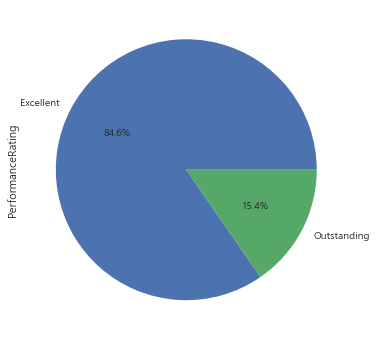

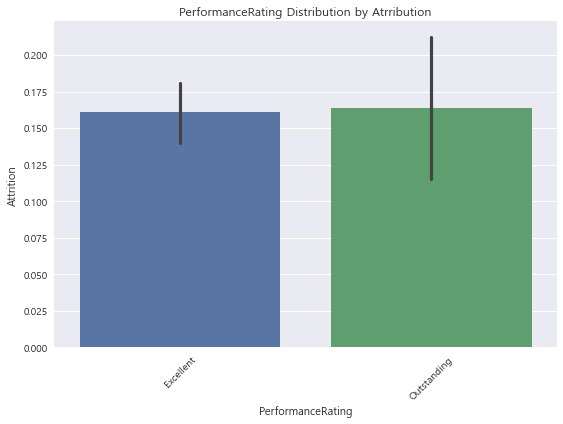

In [57]:
pie_plot("PerformanceRating")
bar_plot("PerformanceRating")

Performance Rating은 변수 설명에 따르면 총 4단계가 있습니다. 그러나, 본 데이터에는 `Excellent`와 `Outstanding` 두 가지 밖에 보이지 않습니다. 퇴직률도 거의 차이가 나지 않는 것을 확인할 수 있습니다. 회사에서 **Performance Rating을 엄격하게 하지 않고 좋은 평가만 주었거나, 또 다른 내부 사정에 의해 이러한 결과가 나왔을 수 있습니다**.

### 2.17. Relationship Satisfaction

**Assumption**: 인간관계는 어디서든 가장 중요한 것 중 하나입니다. 사회생활에 있어서 인간관계에 스트레스를 받는다면 회사를 떠나고 싶은 생각이 들 것이다. 따라서 관계 만족도가 낮다면 퇴직률이 높을 것입니다.

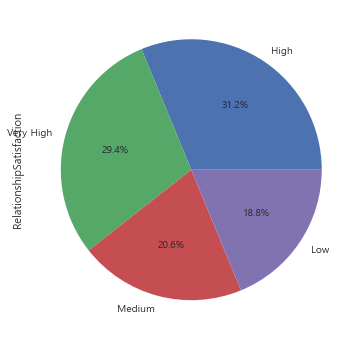

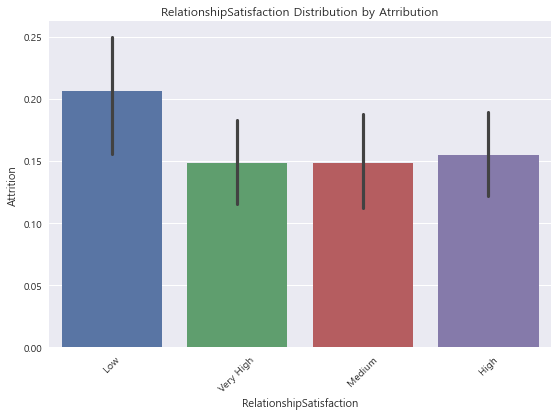

In [58]:
pie_plot("RelationshipSatisfaction")
bar_plot("RelationshipSatisfaction")

`인간관계에 대한 만족도가 낮으면 퇴직률인 높은 것`을 확인할 수 있었습니다. 눈에 띄는 것은, 앞선 만족도 결과와 마찬가지로 부정적 요인은 되나 긍정적 요인은 아니라는 것입니다. 사람들이 만족하거나 보통이라고 느낄 때는 퇴직 여부에 영향을 크게 주지 않지만, 불만족할 때는 퇴직 여부에 크게 영향을 줍니다. 즉, **인간관계가 좋다는 것이 퇴직을 하지 않을 이유가 되지는 않지만 인간관계가 좋지 않으면 퇴직을 할 이유가 된다는 것입니다**. 

### 2.18. Stock Option Level

**Assumption**: `Stock Option Level이 낮을 수록 퇴직률이 높을 것 입니다.`

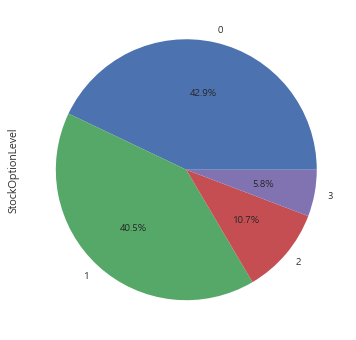

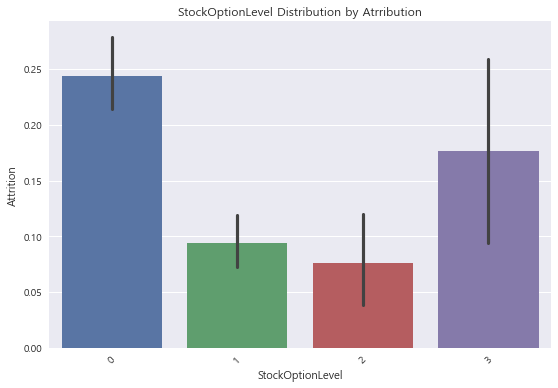

In [59]:
pie_plot("StockOptionLevel")
bar_plot("StockOptionLevel")

스탁옵션이 없을 수록 회사에서 받는 혜택이 적으므로 퇴직률이 높을 것입니다. 그래프에서도 `Level이 0인 사람의 퇴직률이 가장 높게 나타나고 있습니다`. 눈에 띄는 점은 `Level 3의 퇴직률도 높다는 것`입니다. 스톡옵션은 연봉이 아닙니다. 흔히 스타트업에서 연봉 협상을 할 때 대신 스톡옵션을 준다는 말을 들어봤을텐데, 돈이 될 수도 있지만 휴지조각이 될 수도 있는 것이 스톡옵션입니다. 따라서, **성과를 냈을 때 연봉이 오르는 것 보다 스톡옵션이 더 많이 주어진다면, 제약이 있는 보상을 받은 것이므로 퇴직률이 오를 수 있을 것 같습니다.**

### 2.19. Total Working Years	

**Assumption**: `총 근무년수가 작거나 큰 경우 퇴직률이 높을 것`이다. 총 근무년수가 작은 경우는 사회 초년생들의 퇴직때문에 퇴직률이 높을 것으로 예상되며, 총 근무년수가 큰 경우에는 명예퇴직으로 인해 퇴직률이 높을 것으로 예상된다.

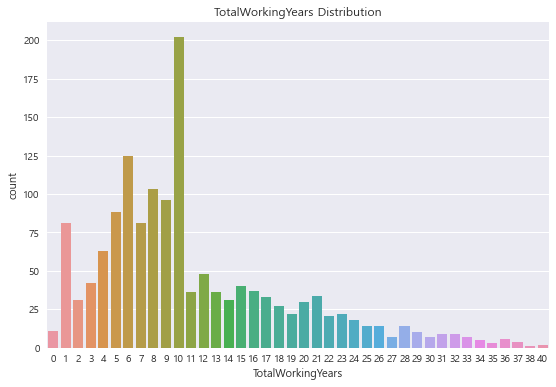

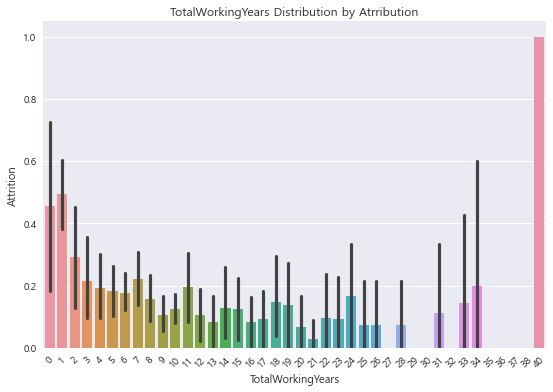

In [60]:
count_plot("TotalWorkingYears")
bar_plot("TotalWorkingYears")

예상한 것처럼 `총 근무년수가 작거나 큰 경우 퇴직률이 높은 것`으로 확인되었다.

### 2.20. Work Life Balance

**Assumption**: `Work Life Balance이 낮을 수록 퇴직률이 높을 것 입니다.`

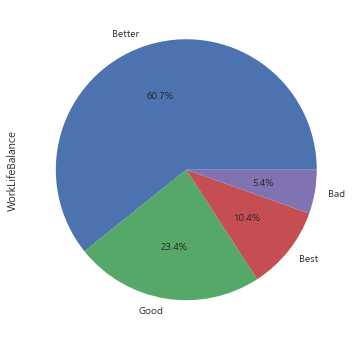

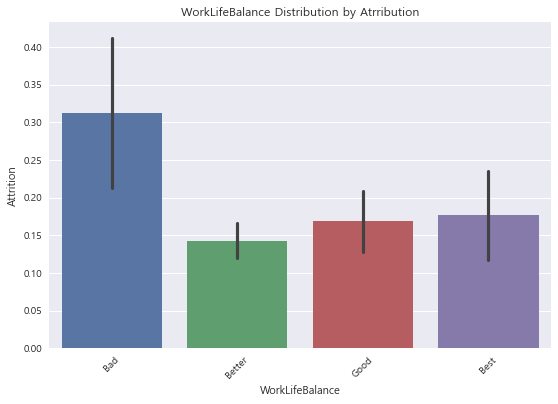

In [61]:
pie_plot("WorkLifeBalance")
bar_plot("WorkLifeBalance")

예상대로 `워라밸이 나쁠 수록 퇴직률이 높은 것을 확인`할 수 있습니다. 이 역시 위에서 다뤘던 만족도와 같은 맥락으로 Bad일 때 퇴직률이 급증하는 것을 볼 수 있습니다.

--------------

### 2.21. 허즈버그의 2요인 이론

위에서 살펴 본 변수 중 `Relationship Satisfaction`, `Job Satisfaction`, `Environment Satisfaction`, `Job Involvement`, `Work Life Balance`에서 재밌는 점을 발견할 수 있었습니다.

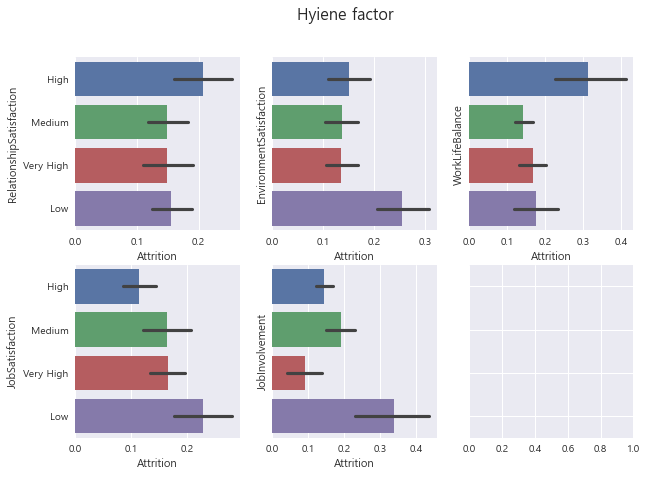

In [62]:
f,axes=plt.subplots(nrows=2,ncols=3,figsize=(10,7),sharey=True)
plt.suptitle("Hyiene factor", fontsize=16)

sns.barplot(x=data["Attrition"],y=data["RelationshipSatisfaction"],ax=axes[0,0])
sns.barplot(x=data["Attrition"],y=data["EnvironmentSatisfaction"],ax=axes[0,1])
sns.barplot(x=data["Attrition"],y=data["WorkLifeBalance"],ax=axes[0,2])
sns.barplot(x=data["Attrition"],y=data["JobSatisfaction"],ax=axes[1,0])
sns.barplot(x=data["Attrition"],y=data["JobInvolvement"],ax=axes[1,1])
plt.show()

다섯 개 모두에서 `Low`에서의 퇴직률 급증을 살펴볼 수 있습니다. **직무와 관련된** `Job Satisfaction`과 `Job Involvement`는 Medium, High, Very High에서도 차이를 보이지만, `Relationship Satisfaction`, `Environment Satisfaction`, `Work and Life Balance`의 경우에는 거의 차이가 나지 않습니다. 위에서도 **만족도가 보통이거나 높을 때는 퇴직률에 큰 영향을 미치지 못하지만 불만족할 때에 퇴직률에 큰 영향을 받는다**고 설명했는데요, 이는 **허즈버그의 2요인 이론**과 관련 있습니다. 

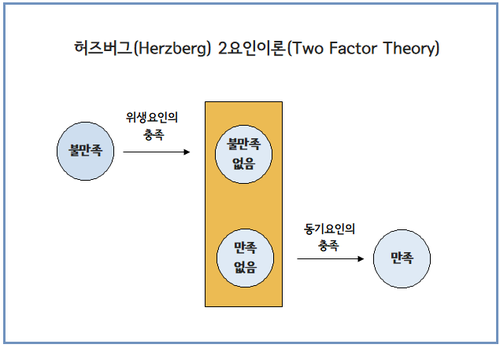

In [63]:
Image("C:/Users/froms/Desktop/TOBIGS/week1_EDA/과제/2요인이론.png")

2요인 이론이란, `위생요인`과 `동기요인`을 중심으로 동기 부여를 설명하는 이론입니다. 우리는 흔히 만족과 불만족을 급부관계로 생각합니다. 그러나 허즈버그는 **불만족 요인을 해소하면 만족의 상태가 되는 것이 아니라 불만족 없음(No Dissatisfaction) 상태로 변화되고, 만족 없음(No Satisfaction) 상태를 해소 해야 만족의 상태에 접어든다**고 설명합니다. 

**불만족에서 불만족 없음 상태**로 가려면 `위생요인`의 충족이, **만족 없음에서 만족의 상태**로 가려면 `동기요인`의 충족이 필요합니다. 그렇다면 동기요인과 위생요인은 무엇일까요?

- `동기요인`: 개인의 내적 성장을 추구하며 개인의 만족을 증가시켜주는 욕구로, 직무 내용과 관련있는 성취감, 인정, 직무 자체, 책임의 증대, 승진 등이 있습니다.
- `위생요인`: 개인의 불만족을 방지하려는 욕구로, 직무 환경, 작업 조건, 감독, 신분 안정, 복지, 대인 관계 등이 있습니다.

여기서 우리는 `Relationship Satisfaction`, `Environment Satisfaction`, `Work and Life Balance`이 **위생요인**이라는 것을 알 수 있습니다. 이에 반해 `Job Satisfaction`과 `Job Involvement`는 **직무와 관련있는 요인**으로 **동기요인**에 가까워, Medium, High, Very High일 때 차이가 있었던 것입니다. 

위생요인과 동기요인은 그 성격이 근본적으로 다르므로, 어느 한 쪽이 높아져도 다른 한쪽을 대체할 수 없습니다. 따라서 **직무확대**나 **직무 충실화**를 통해 직무 속에 동기 요인을 구축하고 구성원들이 `위생요인` 보다 `동기요인`을 추구하도록 할 필요가 있습니다. 

**동기 요인을 직무에서 구축하는 것**이 이 2요인 이론의 핵심인데요. 사원들의 관계, 환경 문제, 워라밸 등을 개선시키면 불만족은 사라지지만 실제 일을 할 동기가 되지는 못할 가능성이 큽니다. 따라서 동기 부여를 위해 **조금 더 다양하고 어려운 일, 중요성 있는 일을 주고 자율성, 책임감을 부여 해야 합니다**. 

## 3. 수치형 변수간 상관관계 파악

**수치형 변수간 상관관계**를 알아봅시다.

In [64]:
num_cols_data_cor = data[num_feature].corr()
num_cols_data_cor

,Age,DistanceFromHome,JobLevel,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.001686,0.509604,0.497855,0.003634,0.037510,0.680381,-0.019621,0.311309,0.212901,0.216513,0.202089
DistanceFromHome,-0.001686,1.000000,0.005303,-0.017014,0.040235,0.044872,0.004628,-0.036942,0.009508,0.018845,0.010029,0.014406
JobLevel,0.509604,0.005303,1.000000,0.950300,-0.034730,0.013984,0.782208,-0.018191,0.534739,0.389447,0.353885,0.375281
MonthlyIncome,0.497855,-0.017014,0.950300,1.000000,-0.027269,0.005408,0.772893,-0.021736,0.514285,0.363818,0.344978,0.344079
PercentSalaryHike,0.003634,0.040235,-0.034730,-0.027269,1.000000,0.007528,-0.020608,-0.005221,-0.035991,-0.001520,-0.022154,-0.011985
StockOptionLevel,0.037510,0.044872,0.013984,0.005408,0.007528,1.000000,0.010136,0.011274,0.015058,0.050818,0.014352,0.024698
TotalWorkingYears,0.680381,0.004628,0.782208,0.772893,-0.020608,0.010136,1.000000,-0.035662,0.628133,0.460365,0.404858,0.459188
TrainingTimesLastYear,-0.019621,-0.036942,-0.018191,-0.021736,-0.005221,0.011274,-0.035662,1.000000,0.003569,-0.005738,-0.002067,-0.004096
YearsAtCompany,0.311309,0.009508,0.534739,0.514285,-0.035991,0.015058,0.628133,0.003569,1.000000,0.758754,0.618409,0.769212
YearsInCurrentRole,0.212901,0.018845,0.389447,0.363818,-0.001520,0.050818,0.460365,-0.005738,0.758754,1.000000,0.548056,0.714365


숫자로만 보니 눈에 띄지 않아 **색깔**을 넣어 주었습니다.

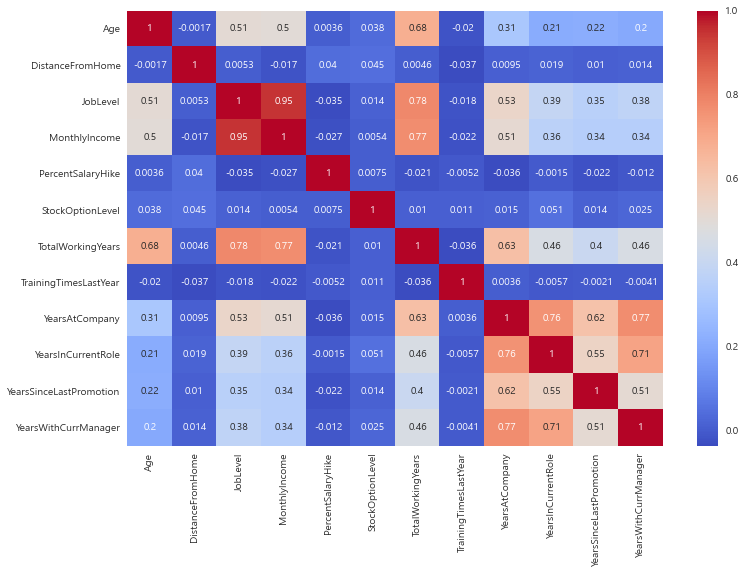

In [65]:
plt.figure(figsize=(12,8))
sns.heatmap(num_cols_data_cor,cmap='coolwarm', annot=True)

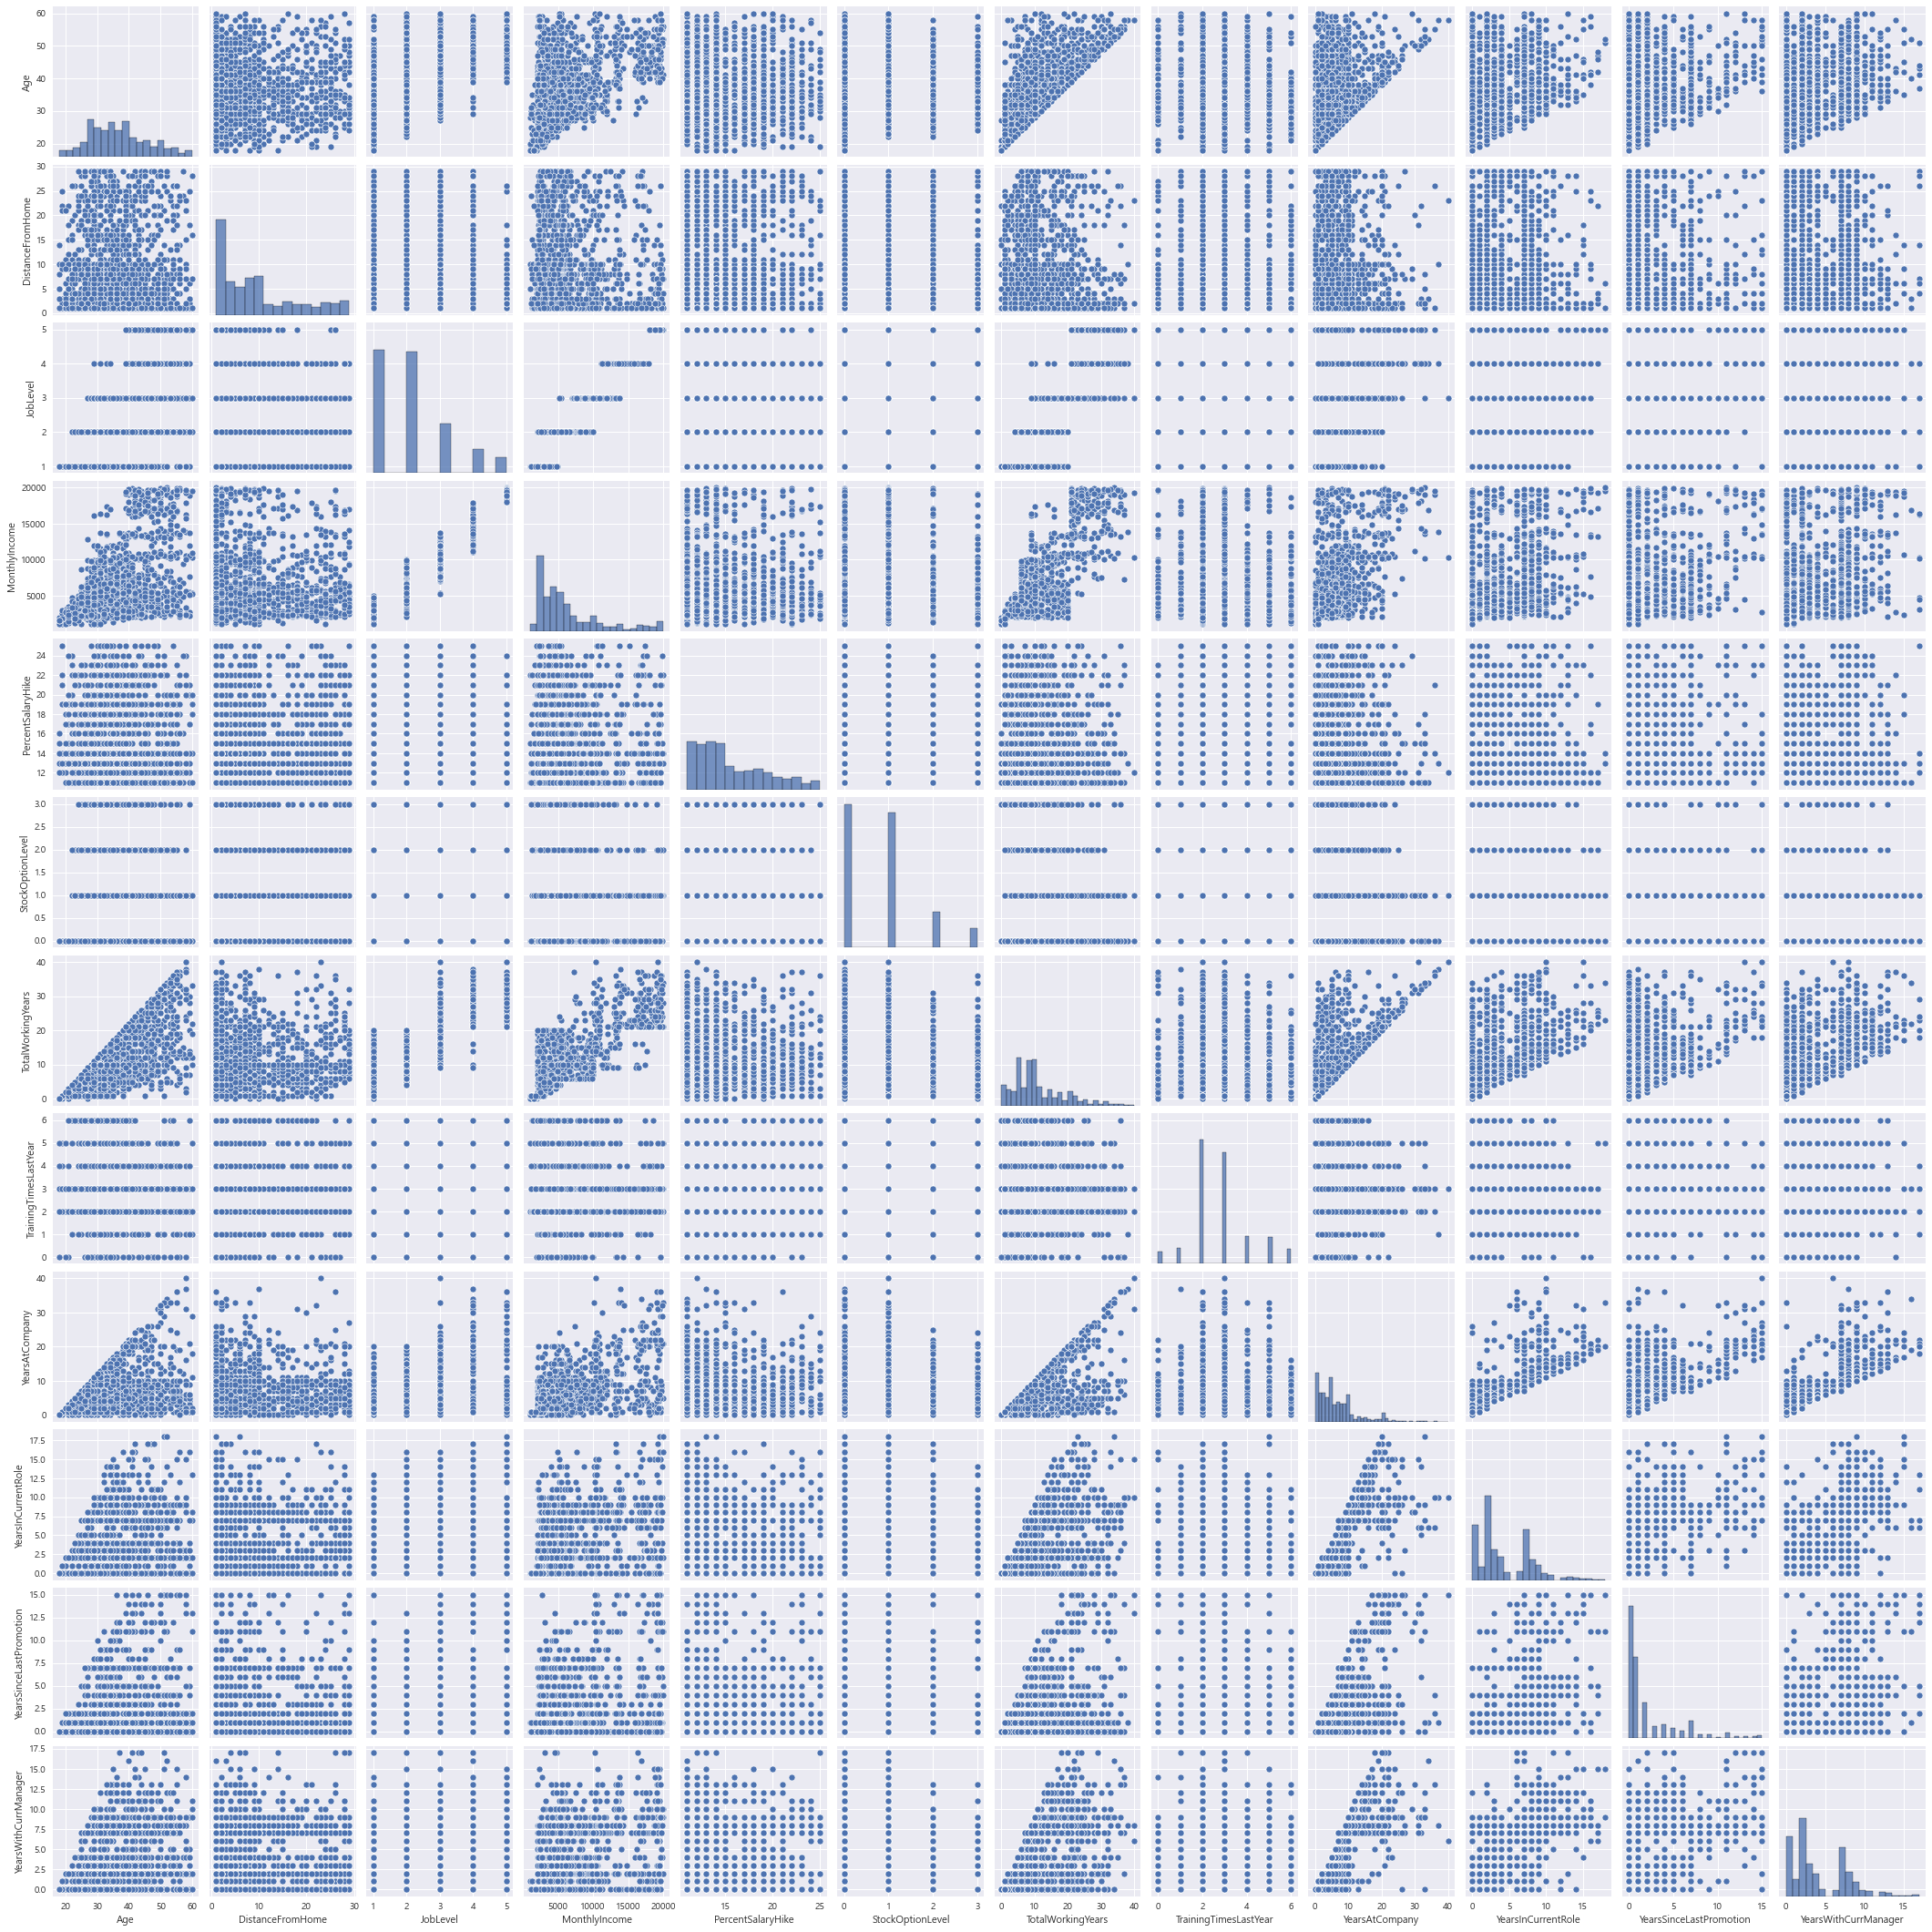

In [66]:
sns.pairplot(data[num_feature])

1. `Monthly Income`은 `Job level`과 높은 상관관계가 있습니다. 직업 수준이 높을 수록 소득을 많이 받을 것이므로 이는 당연한 결과입니다.
2. `Job level`은 `Total Working Years`와도 높은 상관관계를 가집니다. 근속년수가 오래될 수록 직무 수준이 고도화될 것이므로 이 역시 당연합니다. 앞의 두 사실에 따라 `Monthly Income`과 `Total Experience`도 높은 상관관계를 가질 것이라는 사실을 예상할 수 있습니다.  
3. `Years At Company`와 `Years with Current Manager`, `Years Current Role`도 높은 상관관계를 가집니다. 부서가 자주 바뀌지 않는다면 회사에 오래있을 수록 같은 매니저 밑에 있을 것이고 비슷한 일을 할 것이므로 이 역시 당연한 결과입니다. 

그 외에도 상관관계가 높게 나타난 것은 나이와 총 근무년수 등 논리적으로 당연히 상관관계가 높을 것으로 예상되는 것들이었습니다.

## 4. 파생변수 만들기

### 4.1. Total Satisfaction

환경만족도, 관계만족도, 직업만족도를 합친 `Total Satisfaction` feature를 생성하였습니다. 

In [67]:
point = {'Low' : 0, 'Medium' : 1, 'High' : 2 , 'Very High' : 3}
EnvSatisfaction = data['EnvironmentSatisfaction'].map(point)
RelSatisfaction = data['RelationshipSatisfaction'].map(point)
JobSatisfaction = data['JobSatisfaction'].map(point)
data['TotalSatisfaction'] = (EnvSatisfaction + RelSatisfaction + JobSatisfaction).astype(object)

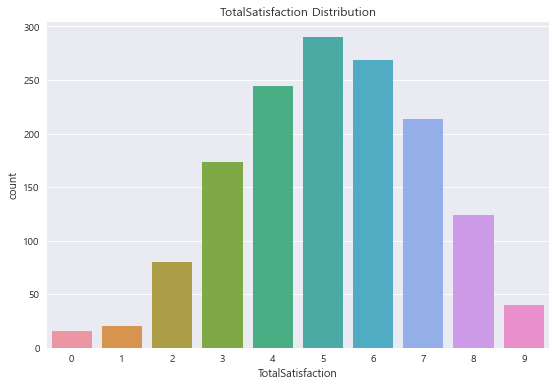

In [68]:
count_plot('TotalSatisfaction')

### 4.2. Generation

`Age` 변수를 활용해 **베이비붐 세대**(1946 ~ 1964년생), **X세대**(1965 ~ 1980년생), **밀레니얼 세대**(1981 ~ 1996년생), **Z세대**(1997년생 ~) 로 나누었습니다. 본 데이터는 4년 전 데이터이므로 이를 고려해서 X세대는 53세에서 60세(데이터 내 최대연령), X세대는 37세에서 52세, 밀레니얼 세대는 21세에서 36세, Z세대는 18세(데이터 내 최소연령)에서 20세로 설정하였습니다.

In [69]:
data["Generation"] = data["Age"].apply(lambda x: "Boomers" if 52 < x else "X Generation" if 36 < x else "Millenials" if 20 < x else "Z Generation" if 0 < x else np.nan)

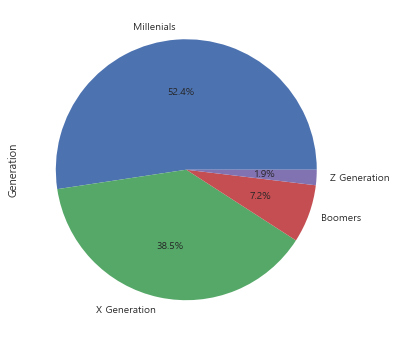

In [70]:
pie_plot("Generation")

### 4.3. Company Consistency

NumCompaniesWorked 변수의 신뢰성에 문제가 있어 제거하였지만, 만약 신뢰할 수 있는 지표였다면 `일한 회사의 수와 총 근무년수를 나눠 근무지속성을 보는 지표`를 만들 수 있었을 것입니다. 

In [73]:
data['CompanyConsistency'] = (org['NumCompaniesWorked']) / org['TotalWorkingYears']
data['CompanyConsistency'] = data['CompanyConsistency'].replace(np.Inf, 0)

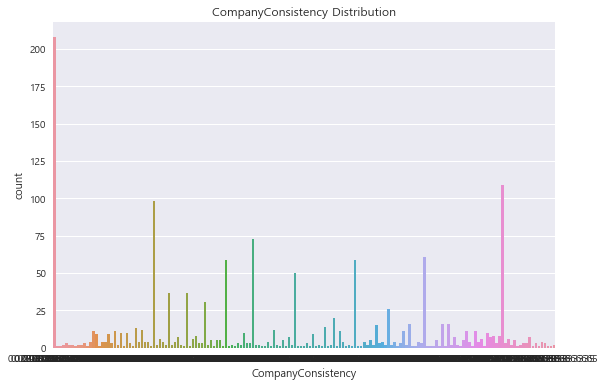

In [74]:
count_plot("CompanyConsistency")

### 4.4. Job Consistency

앞서 회사의 근무 지속성을 살펴보았다면, 직무의 근무 지속성 또한 살펴볼 수 있습니다. `현재 직무에 있었던 연수를 IBM에 재직한 기간으로 나누어 직무의 근무지속성을 살펴보는 지표`를 만들었습니다. 

In [76]:
data['JobConsistency'] = data['YearsInCurrentRole'] / data['YearsAtCompany']
data['JobConsistency'].fillna((data['JobConsistency'].mean()), inplace=True)

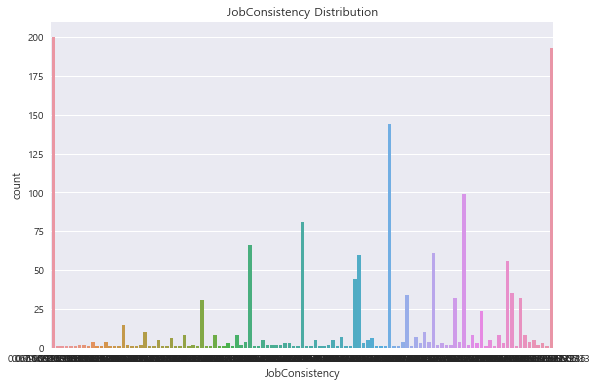

In [77]:
count_plot("JobConsistency")

### 4.5 연차 대비 임금

연차 대비 돈을 얼마나 받느냐도 퇴직 결정의 큰 요인이 될 수 있습니다. 따라서 `Monthly Income을 Years At Company로 나눠 연차 대비 임금 지표`를 생성할 수 있습니다. 

In [79]:
data['IncomeOnYears'] = data['MonthlyIncome'] / data['YearsAtCompany']
data['IncomeOnYears'] = data['IncomeOnYears'].replace(np.Inf, 0)

In [ ]:
count_plot("IncomeOnYears")